#**DBSCAN**


#Step 1 : Import Libraries



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

#Step 2 : Prepare dataset
###**use make blobs with different numbers**



In [ ]:
X, y = make_blobs(n_samples=500, centers=3,
                       cluster_std=0.50, random_state=0)

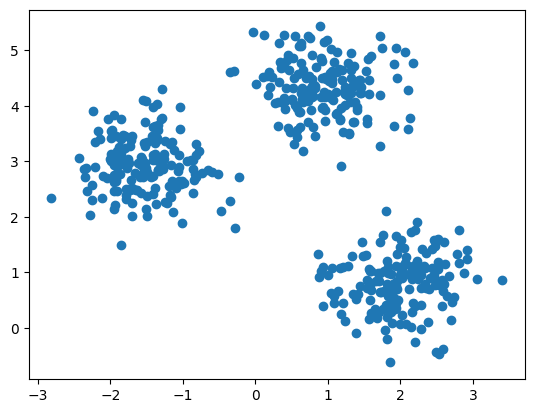

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.show()

#Step 3 : Modeling The Data Using DBSCAN



In [ ]:
db = DBSCAN(eps=0.4, min_samples = 10).fit(X)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


Estimated number of clusters: 3
Estimated number of noise points: 21


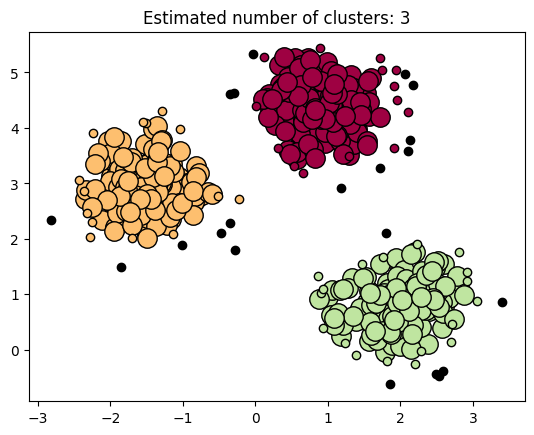

In [ ]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

#Step 4 : Evaluation Metrics For DBSCAN Algorithm In Machine Learning


In [ ]:
print(f"Homogeneity: {metrics.homogeneity_score(y, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(y, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(y, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(y, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.959
Completeness: 0.859
V-measure: 0.906
Adjusted Rand Index: 0.936
Adjusted Mutual Information: 0.905
Silhouette Coefficient: 0.656


#**Well Done :)**